In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier ,RandomForestRegressor


In [124]:
# Cargamos los datos.
df = pd.read_csv("ANSUR_II_FEMALE.csv")

# Variable respuesta.
y = np.array(df.bicepscircumferenceflexed)

# Drop variables no númericas.
non_numeric = ["Branch", "Component", "Gender",
              "BMI_class", "Height_class", "bicepscircumferenceflexed"]
X = df.drop(non_numeric, axis=1)

# Partimos el data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=23) 

# Feature Selection

## LassoCV

In [125]:
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test ,y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 2.420
The model explains 85.0% of the test set variance
49 features out of 93 selected


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## Gradient Boosting Regressor

In [126]:
# Gradiente Boosting Regressor
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

## Random Forest Regressor


In [127]:
# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 90 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 87 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 84 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 81 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 78 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 75 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 72 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 69 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 66 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 63 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 60 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 57 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 54 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 51 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 48 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 45 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 42 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 39 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 36 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 33 features.
Fitting estimator with 30 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 27 features.
Fitting estimator with 24 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 21 features.
Fitting estimator with 18 features.


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 15 features.
Fitting estimator with 12 features.
The model can explain 81.0% of the variance in the test set


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Emsamble de modelos

In [128]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm = LinearRegression()
scaler = StandardScaler()
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 84.2% of the variance in the test set using 5 features.


### Feature Extraction

In [131]:
# Cargamos los datos
sales_df = pd.read_csv("grocery_sales.csv")

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df["revenue"]/sales_df["quantity"]
 
# Drop the quantity and revenue features
reduced_df = sales_df.drop(["revenue", "quantity"], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [144]:
from sklearn.decomposition import PCA
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(X)

# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=4)
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

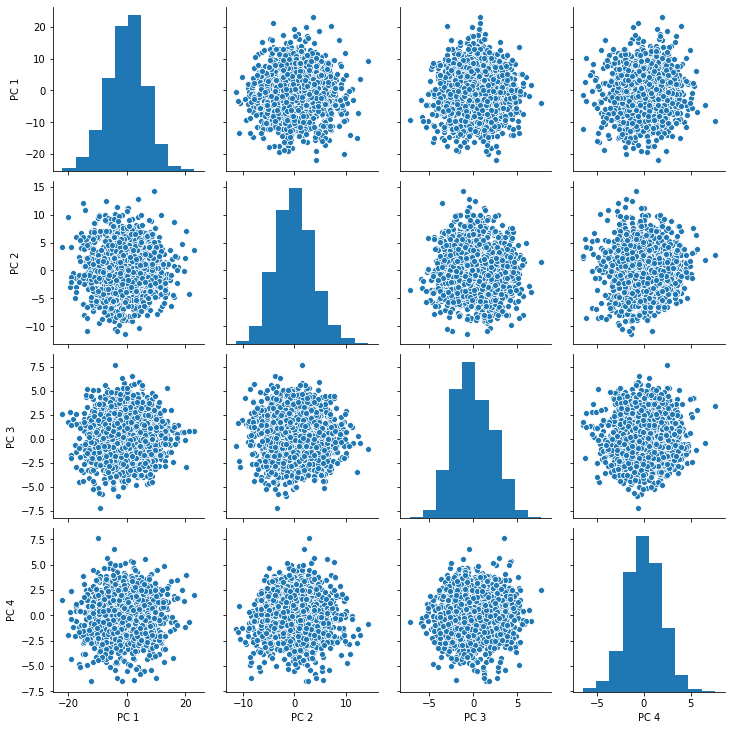

In [152]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)


In [153]:
print(pca.explained_variance_ratio_)

[0.44143857 0.14962817 0.05119312 0.03820151]


In [156]:
pca.explained_variance_ratio_.cumsum()

array([0.44143857, 0.59106673, 0.64225985, 0.68046137])

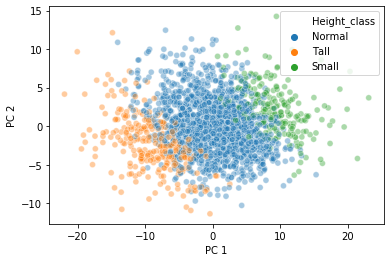

In [162]:
sns.scatterplot(pc_df["PC 1"], pc_df["PC 2"],
               hue=df["Height_class"], alpha=0.4)

In [163]:
# Pipeline 
from sklearn.pipeline import Pipeline

In [168]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(X)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(X.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(X.columns, vectors[1]))))

PC 1 effects = {'abdominalextensiondepthsitting': -0.08, 'acromialheight': -0.13, 'acromionradialelength': -0.12, 'anklecircumference': -0.08, 'axillaheight': -0.13, 'balloffootcircumference': -0.1, 'balloffootlength': -0.12, 'biacromialbreadth': -0.1, 'bicristalbreadth': -0.09, 'bideltoidbreadth': -0.11, 'bimalleolarbreadth': -0.1, 'bitragionchinarc': -0.09, 'bitragionsubmandibulararc': -0.08, 'bizygomaticbreadth': -0.06, 'buttockcircumference': -0.11, 'buttockdepth': -0.1, 'buttockheight': -0.13, 'buttockkneelength': -0.14, 'buttockpopliteallength': -0.12, 'calfcircumference': -0.1, 'cervicaleheight': -0.13, 'chestbreadth': -0.09, 'chestcircumference': -0.09, 'chestdepth': -0.09, 'chestheight': -0.12, 'crotchheight': -0.12, 'crotchlengthomphalion': -0.09, 'crotchlengthposterioromphalion': -0.06, 'earbreadth': -0.03, 'earlength': -0.04, 'earprotrusion': -0.0, 'elbowrestheight': -0.0, 'eyeheightsitting': -0.08, 'footbreadthhorizontal': -0.09, 'footlength': -0.13, 'forearmcenterofgriple

In [175]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

[0.7254338  0.16462786]
1.8% test set accuracy


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [176]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

[0.7254338  0.16462786 0.058365  ]
2.7% test set accuracy


/Users/enrique/anaconda3/envs/prueba/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
